In [382]:
#importing libraries

#main libraries
import re
import requests
import pandas as pd
from bs4 import BeautifulSoup

#models and additional components
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

#graphs and metrics
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score

import pickle
from sklearn.feature_extraction.text import TfidfVectorizer 
import spacy
from sklearn import metrics

#Future Warnings
import warnings
warnings.filterwarnings("ignore")

#nlp = spacy.load(r"/opt/anaconda3/lib/python3.9/site-packages/en_core_web_sm/en_core_web_sm-3.0.0")

In [383]:
#to avoid blacklisting
headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_10_1) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/39.0.2171.95 Safari/537.36'}

In [384]:
"""This function returns a list of songs links of an artist within the web-page(www.lyrics.com) """

def get_links(artist:str):
    html=requests.get(f'https://www.lyrics.com/artist/{artist}').text  
    html_soup = BeautifulSoup(html, 'html.parser')
    
    link_list=[]
    for links in html_soup.find_all(attrs={"class":"tal qx"}):
        for link in links.find_all('a'):
            te_link=link.get('href')
            lyr_link='https://www.lyrics.com/'+te_link
            
            link_list.append(lyr_link)
    return link_list

In [385]:
"""Define function, that returns a string with song's lyrics (www.lyrics.com)"""

def get_lyrics(song_link:str):
    string=''
    song_html=requests.get(song_link).text
    lyrics_soup = BeautifulSoup(song_html, 'html.parser')

    for section in lyrics_soup.find_all(attrs={'class':'lyric-body'}):
            text=section.text.split()
            for i in text:
                string+=i.lower()+' '
    return string

In [386]:
#got a lyrics list for artist 1
melany_links=get_links('melanie martinez')  
melany_lyrics=[]
for link in melany_links:
    melany_lyrics.append(get_lyrics(link))
    

In [387]:
#got a lyrics list for artist 2
oliver_links=get_links('oliver tree')  
oliver_lyrics=[]
for link in oliver_links:
    oliver_lyrics.append(get_lyrics(link))

In [388]:
#saving pre spacy files
for element in melany_lyrics:
    open("Melanie-Martinez_prespacy.txt", "a+").write(element+"\n")
    
for element in oliver_lyrics:
    open("Oliver-Tree_songs_prespacy.txt", "a+").write(element+"\n")

____________________________________________________________

SPACY LIBRARY

SpaCy - is an open-source software library for advanced natural language processing, written in the programming languages Python and Cython. The library is published under the MIT license and its main developers are Matthew Honnibal and Ines Montani, the founders of the software company Explosion.

Main features:
- Non-destructive tokenization
- "Alpha tokenization" support for over 65 languages.
- Built-in support for trainable pipeline components such as Named entity recognition, Part-of-speech tagging, dependency parsing, Text classification, Entity Linking and more.
- Statistical models for 19 languages.
- Multi-task learning with pretrained transformers like BERT.
- Support for custom models in PyTorch, TensorFlow and other frameworks.
- State-of-the-art speed and accuracy.
- Production-ready training system.
- Built-in visualizers for syntax and named entities.
- Easy model packaging, deployment and workflow management.

Link: https://github.com/explosion/spacy-models/blob/master/README.md

____________________________________________________________

In [389]:
#CODE FROM GIT HUB(CERTIFIED MIT)
model = spacy.load('en_core_web_sm')

In [390]:
#CODE FROM GIT HUB(CERTIFIED MIT)
"""use spacy to tokenize, lemmatize and remove stop words"""
def clean_my_string(string):
    clean_string = []
    token_string = model(string)
    for token in token_string:
        if not token.is_stop and not token.is_punct and not token.like_num:
            clean_string.append(token.lemma_)
    return ' '.join(clean_string)

In [391]:
#apllying spacy for artist 1
clean_melany=[]
for item in melany_lyrics: 
    item=clean_my_string(item)
    clean_melany.append(item)

In [392]:
#apllying spacy for artist 2
clean_oliver=[]
for item in oliver_lyrics:   
    item=clean_my_string(item)
    clean_oliver.append(item)

In [100]:
#checking the difference in length after spacy cleaning
print(len(melany_lyrics[0]),len(clean_melany[0]))
print(len(oliver_lyrics[0]),len(clean_oliver[0]))

1445 685
1277 416


In [101]:
print(len(clean_melany),len(clean_oliver)) 

120 104


____________________________________________________________

DATAFRAMES

In [336]:
df1=pd.DataFrame({'lyrics':clean_oliver, 'artist':"Oliver Tree"})
df1

,lyrics,artist
0,day come give sell soul wait pay die love see ...,Oliver Tree
1,introspective need thing messy overcomplicate ...,Oliver Tree
2,fall earth mile away work overrated play door ...,Oliver Tree
3,everybody know stick everybody hate feel think...,Oliver Tree
4,day come give sell soul wait pay die love see ...,Oliver Tree
...,...,...
99,day come give sell soul wait pay die love see ...,Oliver Tree
100,wo waste time life people alike mind fit stick...,Oliver Tree
101,introspective need thing messy overcomplicate ...,Oliver Tree
102,let let well come save save time save save tim...,Oliver Tree


In [337]:
df2=pd.DataFrame({'lyrics':clean_melany, 'artist':'Melanie Martinez'})
df2

,lyrics,artist
0,look window cold outside boy yell terrify coun...,Melanie Martinez
1,middle class teacher lookin kelly fat ass trou...,Melanie Martinez
2,sneaky greedy money seek peep fucking creep ge...,Melanie Martinez
3,pull hair tell love treat like cruel word brea...,Melanie Martinez
4,cut punch let nurse office float away pale loo...,Melanie Martinez
...,...,...
115,cut punch let nurse office float away pale loo...,Melanie Martinez
116,soft sensitive offend hang sentence costume ma...,Melanie Martinez
117,feel unsure naked body stand watch take shape ...,Melanie Martinez
118,oh oh oh oh oh oh oh oh say hey girl sit table...,Melanie Martinez


In [338]:
df=pd.concat([df1,df2])

In [339]:
df

,lyrics,artist
0,day come give sell soul wait pay die love see ...,Oliver Tree
1,introspective need thing messy overcomplicate ...,Oliver Tree
2,fall earth mile away work overrated play door ...,Oliver Tree
3,everybody know stick everybody hate feel think...,Oliver Tree
4,day come give sell soul wait pay die love see ...,Oliver Tree
...,...,...
115,cut punch let nurse office float away pale loo...,Melanie Martinez
116,soft sensitive offend hang sentence costume ma...,Melanie Martinez
117,feel unsure naked body stand watch take shape ...,Melanie Martinez
118,oh oh oh oh oh oh oh oh say hey girl sit table...,Melanie Martinez


In [340]:
""""remove words containing numbers"""
def clean_text_final(text):
    text = re.sub('\w*\d\w*', '', text)
    return text

In [341]:
#applying function on X
df['lyrics'] = df['lyrics'].apply(clean_text_final)

____________________________________________________________

TRAIN-TEST SPLIT

In [342]:
#splitting the X,y data 
X,y=df['lyrics'],df['artist']

In [343]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [344]:
X_train.shape,y_train.shape

((168,), (168,))

In [345]:
#Apply TF-IDF Vectorizer
tf = TfidfVectorizer()

In [346]:
vectorized_lyrics=tf.fit_transform(X_train) #creating sparse matrix 
vectorized_lyrics

<168x1825 sparse matrix of type '<class 'numpy.float64'>'
	with 9142 stored elements in Compressed Sparse Row format>

In [347]:
#transforming X_test
X_test_trans=tf.transform(X_test).toarray()

In [348]:
# converting sparse matrix into a dense matrix to view it effectively
tf_vectors=pd.DataFrame(vectorized_lyrics.todense().round(2), columns=tf.get_feature_names()) 

In [349]:
tf_vectors

,abandon,abc,ability,absurd,accept,achieve,act,actin,action,actress,...,yellin,yes,yield,you,young,yz,ça,джакузи,модель,сосёт
0,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.00,0.0,0.04,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.00,0.0,0.04,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.00,0.0,0.00,0.0,0.1,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.05,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
164,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
165,0.0,0.0,0.00,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.04,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0
166,0.0,0.0,0.07,0.0,0.00,0.0,0.0,0.0,0.00,0.0,...,0.0,0.00,0.08,0.0,0.0,0.0,0.0,0.0,0.0,0.0


____________________________________________________________

METRICS

In [356]:
"""METRICS FOR THE MODELS"""
def print_evaluations(X_test,y_test, model):
    y_pred=model.predict(X_test)
    print(f'Accuracy: {round(accuracy_score(y_test, y_pred), 3)}')
    print(f'Precision: {round(precision_score(y_test, y_pred,pos_label="Melanie Martinez"), 3)}')
    print(f'Recall: {round(recall_score(y_test, y_pred, pos_label="Melanie Martinez"), 3)}')
    print(f'F1-score: {round(f1_score(y_test, y_pred,pos_label="Melanie Martinez"), 3)}')
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.Blues,display_labels=['Oliver Tree', 'Melany Martinez'])
    
  

____________________________________________________________

LOGISTIC REGRESSION #1

In [357]:
model=LogisticRegression()
model.fit(tf_vectors,y_train)
print("Train score :",model.score(tf_vectors,y_train))

Train score : 0.9940476190476191


In [358]:
acc_log=round(model.score(X_test_trans,y_test),3)

In [359]:
accuracy=cross_val_score(model,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.8992869875222815


In [360]:
#testing one song for the LR
test_song1=["I don't wanna talk about it all again"]
test=tf.transform(test_song1)
print(model.predict(test))

['Oliver Tree']


Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0


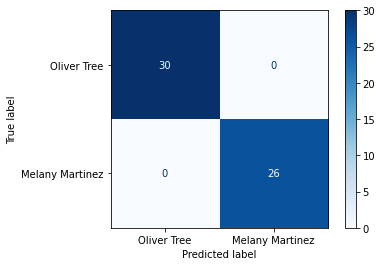

In [361]:
print_evaluations(X_test_trans, y_test, model)

____________________________________________________________

NAIVE BAYES #2

In [362]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(tf_vectors,y_train)
print("Train score :",nb.score(tf_vectors,y_train))

Train score : 0.9940476190476191


In [363]:
acc_nb=round(nb.score(X_test_trans,y_test),3) #saving for later model comparison

In [364]:
accuracy=cross_val_score(nb,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.8930481283422459


In [376]:
#testing one song for the NB
test_song2=["My teeth are sharp like the great white shark"]
test=tf.transform(test_song2)
print(model.predict(test))

['Oliver Tree']


Accuracy: 0.982
Precision: 0.968
Recall: 1.0
F1-score: 0.984


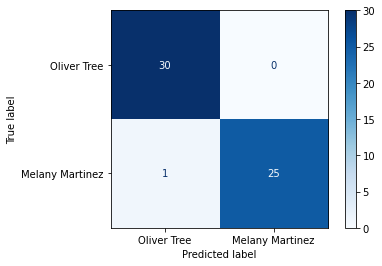

In [366]:
print_evaluations(X_test_trans, y_test, nb)

____________________________________________________________

SUPPORT VECTOR MACHINES #3

In [367]:
from sklearn import svm

svm_clf=svm.SVC(kernel='linear')
svm_clf.fit(tf_vectors,y_train)
print("Train score :",svm_clf.score(tf_vectors,y_train))

Train score : 0.9940476190476191


In [368]:
acc_svm=round(svm_clf.score(X_test_trans,y_test),3) #saving for later model comparison

In [369]:
accuracy=cross_val_score(svm_clf,tf_vectors,y_train)
print("Cross-validation score :", accuracy.mean())

Cross-validation score : 0.8814616755793226


In [370]:
#testing one song for the SVM
test_song3=["I'm sorry I can't help you, somebody should've had your back"]
test=tf.transform(test_song3)
print(model.predict(test))

['Oliver Tree']


Accuracy: 0.982
Precision: 1.0
Recall: 0.967
F1-score: 0.983


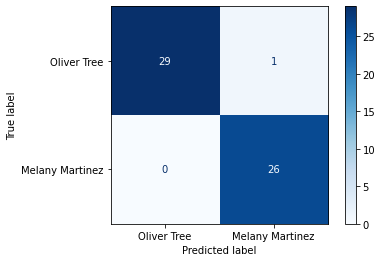

In [371]:
print_evaluations(X_test_trans, y_test, svm_clf)

____________________________________________________________

FINAL MODEL COMPARISON

In [372]:
models = pd.DataFrame({
    'Model': ['Logistic Regression','Naive Bayes', 'Support Vector Machine'],
    
    'Score': [acc_log, acc_nb, acc_svm]
    })

models.sort_values(by='Score', ascending=False)

,Model,Score
0,Logistic Regression,1.000
1,Naive Bayes,0.982
2,Support Vector Machine,0.982


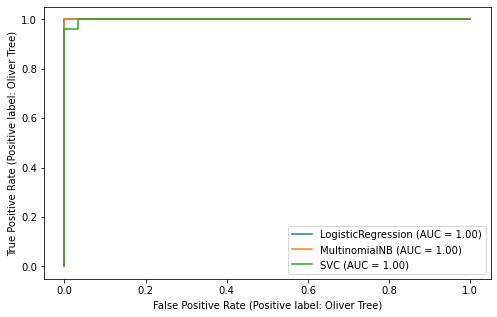

In [373]:
fig, axes = plt.subplots(1,1, figsize=(8,5))
metrics.plot_roc_curve(model, X_test_trans, y_test, ax=axes)
metrics.plot_roc_curve(nb, X_test_trans, y_test, ax=axes)
metrics.plot_roc_curve(svm_clf, X_test_trans, y_test,ax=axes)
